# K Nearest Neighbors algorithm

## Steps:
1. Choose number of neighbors, k (conventional default = 5)
2. Take k nearest neighbors of new point by euclidean distance
3. Out of these k neighbors, count the number of points in each category
4. Whichever category has most nearest neighbors, categorize new datapoint there

#### Standard Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from matplotlib.colors import ListedColormap

END = "\n--------------------------------------------------------\n"

In [11]:
# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### Train Test split

In [12]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=0)

print(x_train[0:5], END, x_test[0:5], END, y_train[0:5], END, y_test[0:5])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]] 
--------------------------------------------------------
 [[   30 87000]
 [   38 50000]
 [   35 75000]
 [   30 79000]
 [   35 50000]] 
--------------------------------------------------------
 [0 1 0 1 1] 
--------------------------------------------------------
 [0 0 0 0 0]


In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train[0:5], END, x_test[0:5])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]] 
--------------------------------------------------------
 [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


#### Training the model

In [14]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

#### Predicting a new result

In [15]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[0:5])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


#### Confusion Matrix

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


#### Other metrics

Accuracy: 0.93
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922
ROC AUC: 0.9237132352941176


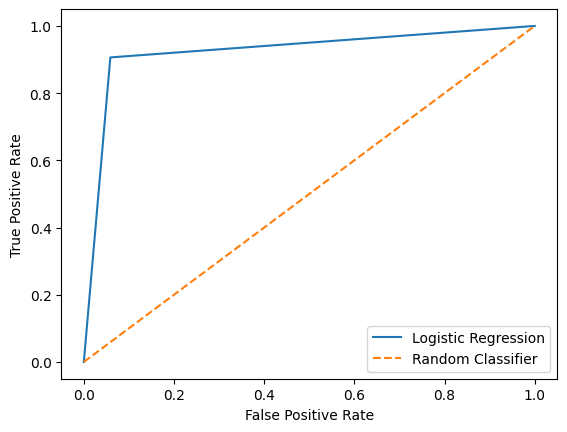

In [17]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Precision
print(f"Precision: {precision_score(y_test, y_pred)}")

# Recall
print(f"Recall: {recall_score(y_test, y_pred)}")

# F1 Score
print(f"F1 Score: {f1_score(y_test, y_pred)}")

# ROC AUC
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], label='Random Classifier', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Result visualisation

Inverse Transformation Complete
Mesh Grid complete
Contour plot complete
xlim, ylim set, beginning scatter plot


C:\Users\hifia\AppData\Local\Temp\ipykernel_17600\4048453618.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


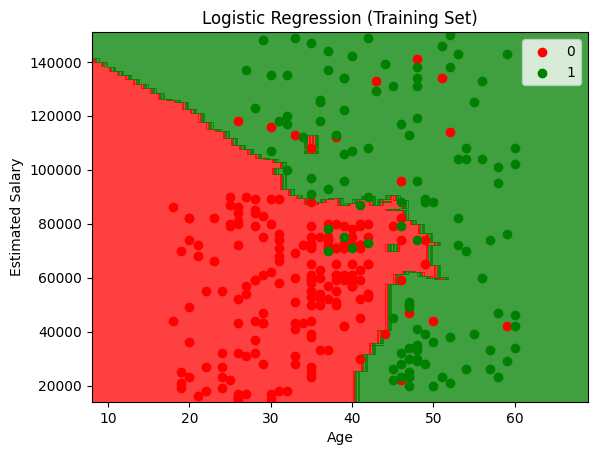

In [21]:
# Training set visualisation
x_set, y_set = sc.inverse_transform(x_train), y_train
print("Inverse Transformation Complete")
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=1), 
                     np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=1))
print("Mesh Grid complete")
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap=ListedColormap(('red', 'green')))
print("Contour plot complete")
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
print("xlim, ylim set, beginning scatter plot")
count = 0
for i, j in enumerate(np.unique(y_set)):
    print(f"Working on iteration {count}", end='\r')
    count += 1
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\hifia\AppData\Local\Temp\ipykernel_17600\1414632248.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


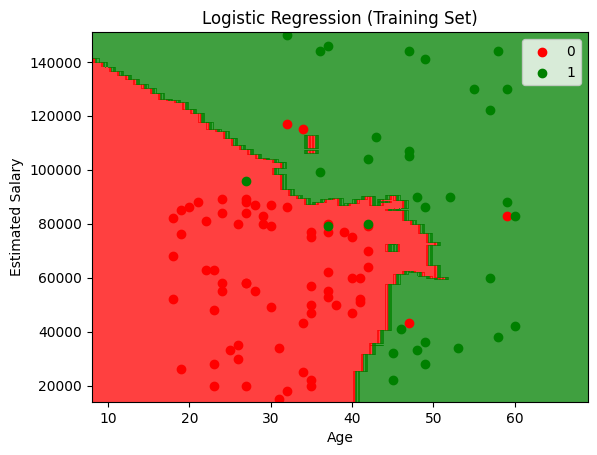

In [22]:
# Test set visualisation
x_set, y_set = sc.inverse_transform(x_test), y_test

X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=1), 
                     np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()